# All final plots and analyses for figure 3

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import scipy.stats as stats
import warnings
from statannotations.Annotator import Annotator
warnings.filterwarnings('ignore')
import joblib

### Load and process Baghela metadate

In [3]:
sraTable = pd.read_csv('../data/bulk_data/Baghela_2020/Metadata_Baghela.csv', index_col=0)
anno = sraTable
anno['disease_group'].value_counts()

disease_group
Sepsis Survived    293
Sepsis Died         52
Healthy Control     44
Name: count, dtype: int64

In [4]:
# Load bulks
bulks = pd.read_csv('../data/bulk_data/Baghela_2020/TPM_data_Baghela.csv', index_col=0)
bulks

,DPM1,SCYL3,FIRRM,FGR,CFH,FUCA2,GCLC,NFYA,STPG1,NIPAL3,...,TRBV6-3,H2BC6-AS1,LOC105372480,RN7SK,MPHOSPH10P3,CNTNAP3C,PET100P1,GPR141BP,LOC100996792,LINC02009
geo_accesion,,,,,,,,,,,,,,,,,,,,,
GSM5609238,4.61,3.94,0.52,159.66,0.99,6.12,7.40,10.56,0.43,6.40,...,4.00,0.70,0.22,8.24,0.00,1.27,0.00,0.00,0.41,0.09
GSM5609334,27.62,7.74,1.80,403.36,1.48,9.35,11.41,17.77,1.60,13.47,...,11.76,0.93,0.28,8.95,0.43,2.68,2.15,0.11,0.00,0.20
GSM5609219,17.90,6.13,0.99,190.06,0.41,7.67,9.31,12.42,0.60,8.90,...,12.95,0.13,0.31,6.79,0.00,1.06,0.00,0.27,0.45,0.00
GSM5609245,19.85,7.40,3.06,195.43,0.67,10.99,13.81,15.31,0.79,13.14,...,12.21,0.30,0.38,3.36,0.00,0.05,0.00,0.00,0.20,0.00
GSM5609213,5.00,2.50,0.97,123.78,0.19,5.23,3.10,4.39,0.51,5.69,...,2.56,0.35,0.08,11.36,0.09,0.41,0.00,0.07,0.04,0.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM5609298,24.80,9.59,0.82,1509.95,1.59,7.37,3.37,20.09,0.54,4.63,...,0.00,2.34,0.47,60.85,2.14,3.97,0.00,0.55,0.28,0.08
GSM5609114,6.05,1.71,0.28,218.38,0.51,3.48,0.69,2.13,0.07,0.58,...,0.26,0.68,0.20,21.01,0.00,0.25,1.30,0.39,0.66,0.02
GSM5609322,55.55,8.69,2.88,408.55,2.73,17.97,18.07,15.72,0.65,6.40,...,2.44,8.11,0.53,51.13,1.05,0.38,0.00,2.50,0.11,9.48


In [5]:
# Load predictions
pred = pd.read_csv('../grood_runs/GrooD_Hao_Baghela/intersect_mRNA/inference/Predicted_cell_type_proportions.csv', index_col=0)
pred

,B cells,CD4 T cells,CD8 T cells,DC,Monocytes,NK cells,Tregs
GSM5609238,0.021858,0.150379,0.045417,0.009398,0.125937,0.043126,0.038134
GSM5609334,0.072355,0.347783,0.064748,0.030755,0.260759,0.101801,0.058758
GSM5609219,0.032436,0.137427,0.119684,0.021985,0.132971,0.044027,0.036564
GSM5609245,0.065441,0.321514,0.227009,0.021999,0.185102,0.060845,0.033397
GSM5609213,0.037557,0.101736,0.038850,0.007259,0.075908,0.069258,0.034207
...,...,...,...,...,...,...,...
GSM5609298,0.042597,0.047385,0.016017,0.008042,0.300368,0.053215,0.022267
GSM5609114,0.010133,0.046002,0.023565,0.006194,0.151453,0.025792,0.026272
GSM5609322,0.037496,0.071949,0.035800,0.026001,0.359700,0.045701,0.016956
GSM5609076,0.004978,0.055703,0.215500,0.006930,0.249249,0.031785,0.027004


In [7]:
def props_with_test(df, metadata, condition):
    metadata.index = metadata['geo_accesion']
    celltypes = df.columns.tolist()
    df = df.copy()
    df[condition] = metadata.loc[df.index.tolist(), condition]

    n = len(celltypes)
    rows = math.floor(math.sqrt(n))
    cols = math.ceil(n/rows)

    fig, axes = plt.subplots(rows, cols, figsize=(cols * 4, rows * 4))
    axes = np.array(axes) # axes must be an iterable array

    axes = axes.flatten() # flatten in case of multi-dimensionality

    for i, celltype in enumerate(celltypes):
        col_selection = [condition, str(celltype)]
        pred_new = df.copy()
        pred_new = pred_new[col_selection]
        pred_new['SampleID'] = pred_new.index.tolist()
        df_plot = pred_new.melt(id_vars=[condition, 'SampleID'])

        p = sns.boxplot(data=df_plot, x = condition, y = "value", hue = condition, ax=axes[i])
        p.set_xticklabels(p.get_xticklabels(), rotation=45, horizontalalignment='right')

        # define pairs for comparison
        pairs = [("Healthy Control", "Sepsis Survived"), ("Healthy Control", "Sepsis Died"), ("Sepsis Survived", "Sepsis Died")]

        # Add annotations
        annotator = Annotator(p, pairs, data=df_plot, x=condition, y="value")
        annotator.configure(test='t-test_ind', text_format='star', loc='inside')
        annotator.apply_and_annotate()

        axes[i].set_title(f"Predictions for {celltype}")
        axes[i].set_xlabel("")
        axes[i].set_ylabel('Inferred proportions')
        #axes[i].set(ylim=(0, 0.55))

    for j in range(n, len(axes)):
        fig.delaxes(axes[j])
    
    fig.suptitle(f"{condition}")

    plt.tight_layout()
    plt.savefig("Figure_3A.svg", dpi=300)

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Healthy Control vs. Sepsis Survived: t-test independent samples, P_val:6.663e-04 t=3.435e+00
Sepsis Survived vs. Sepsis Died: t-test independent samples, P_val:4.845e-01 t=6.998e-01
Healthy Control vs. Sepsis Died: t-test independent samples, P_val:1.257e-02 t=2.544e+00
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Healthy Control vs. Sepsis Survived: t-test independent samples, P_val:1.092e-37 t=1.460e+01
Sepsis Survived vs. Sepsis Died: t-test independent samples, P_val:3.547e-03 t=2.936e+00
Healthy Control vs. Sepsis Died: t-test independent samples, P_val:5.379e-21 t=1.216e+01
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.

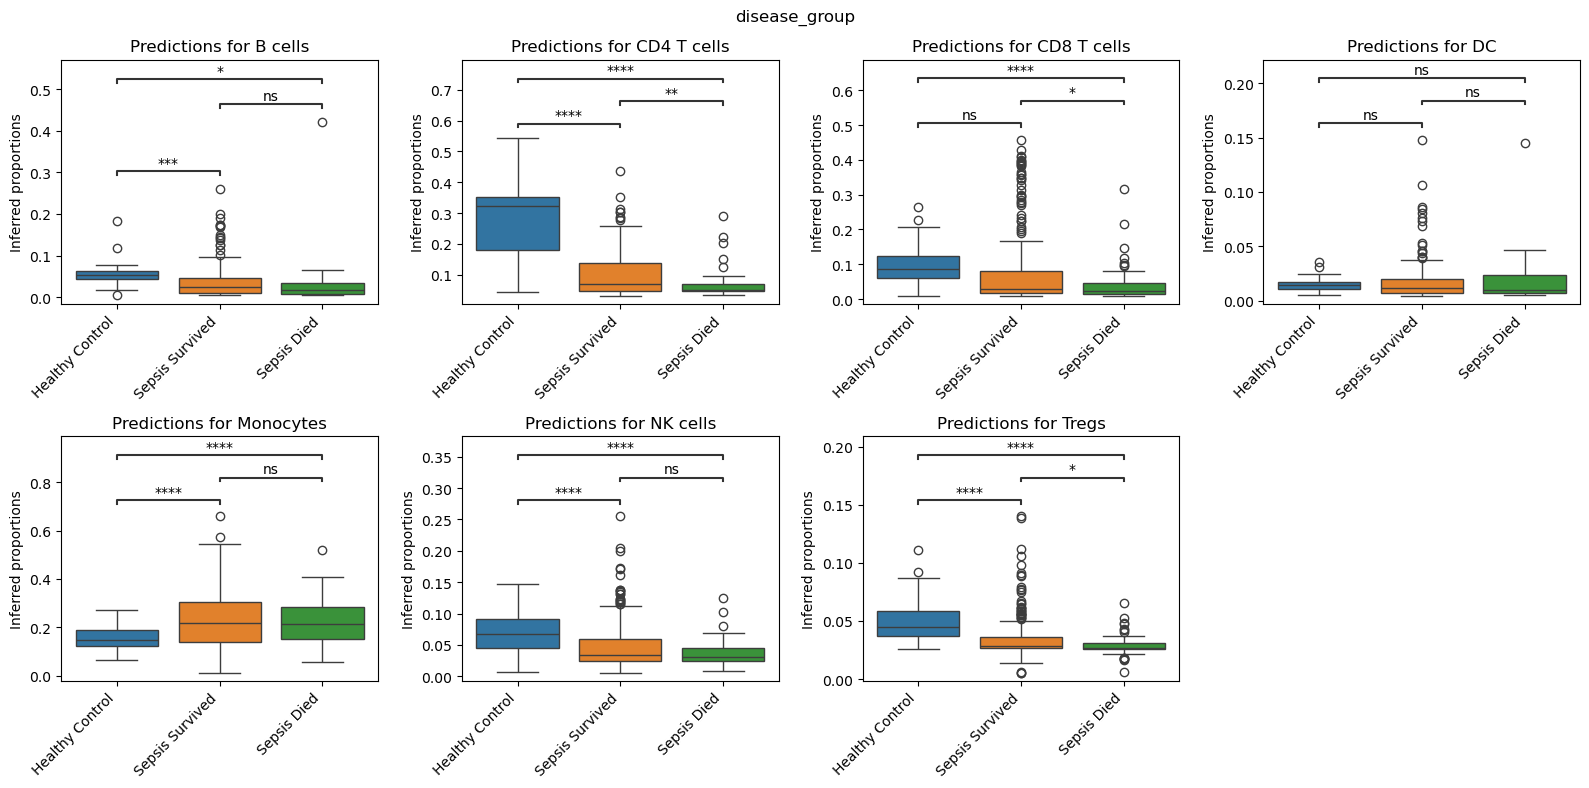

In [8]:
props_with_test(pred, anno, "disease_group")

Analysis without t-test

t-test is not ideal, also since proportions of different cell types are interdependent

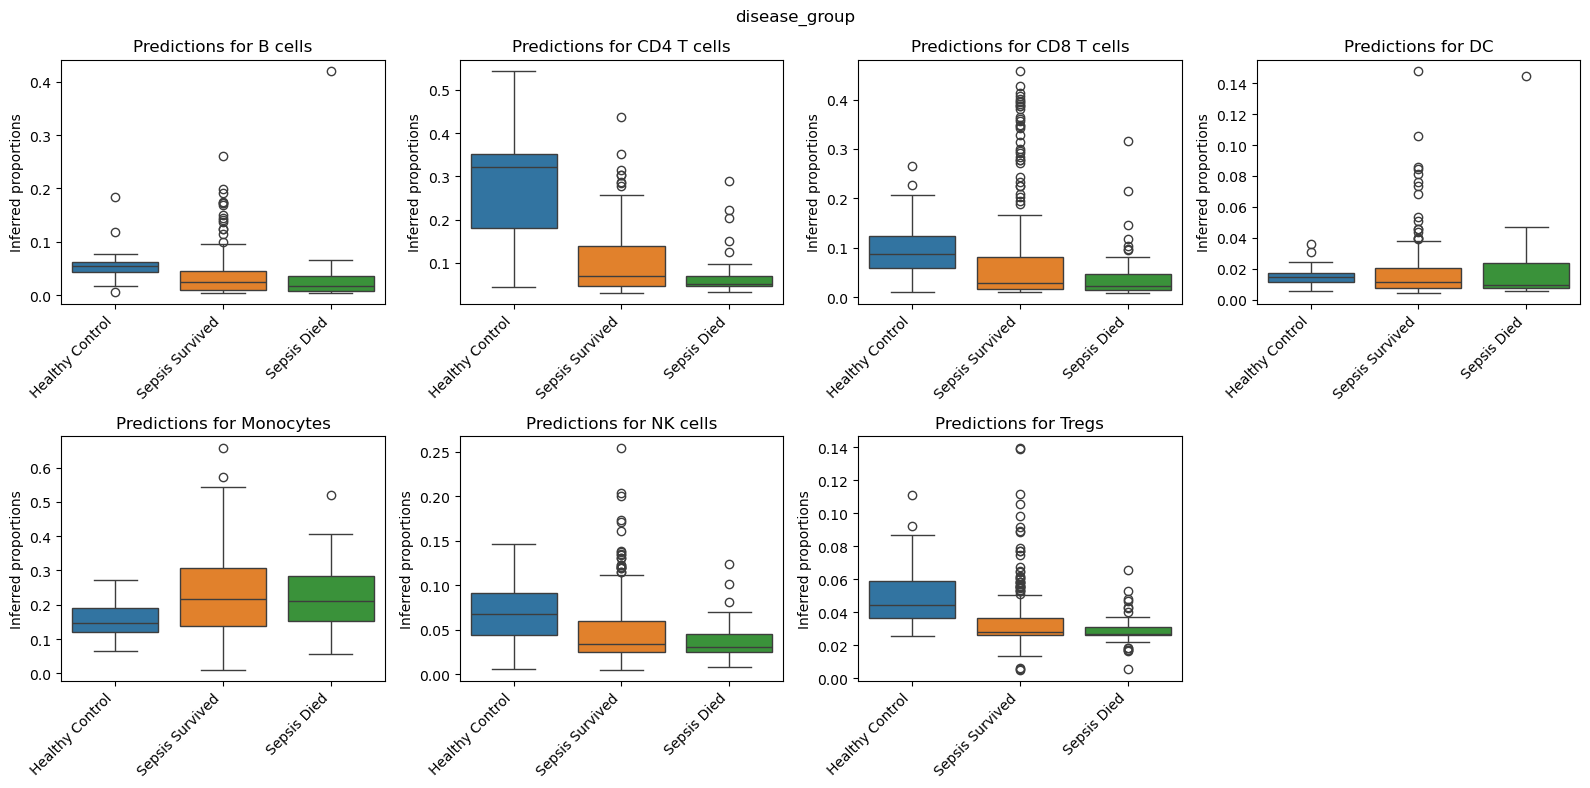

In [20]:
def props_without_test(df, metadata, condition):
    metadata.index = metadata['geo_accesion']
    celltypes = df.columns.tolist()
    df = df.copy()
    df[condition] = metadata.loc[df.index.tolist(), condition]

    n = len(celltypes)
    rows = math.floor(math.sqrt(n))
    cols = math.ceil(n/rows)

    fig, axes = plt.subplots(rows, cols, figsize=(cols * 4, rows * 4))
    axes = np.array(axes) # axes must be an iterable array

    axes = axes.flatten() # flatten in case of multi-dimensionality

    for i, celltype in enumerate(celltypes):
        col_selection = [condition, str(celltype)]
        pred_new = df.copy()
        pred_new = pred_new[col_selection]
        pred_new['SampleID'] = pred_new.index.tolist()
        df_plot = pred_new.melt(id_vars=[condition, 'SampleID'])

        p = sns.boxplot(data=df_plot, x = condition, y = "value", hue = condition, ax=axes[i])
        p.set_xticklabels(p.get_xticklabels(), rotation=45, horizontalalignment='right')

        axes[i].set_title(f"Predictions for {celltype}")
        axes[i].set_xlabel("")
        axes[i].set_ylabel('Inferred proportions')
        #axes[i].set(ylim=(0, 0.55))

    for j in range(n, len(axes)):
        fig.delaxes(axes[j])
    
    fig.suptitle(f"{condition}")

    plt.tight_layout()
    plt.savefig("Figure_3A_without_test.svg", dpi=300)

props_without_test(pred, anno, "disease_group")

In [9]:
a = anno[anno['disease_group']=='Healthy Control'].index.tolist()
b = list(np.random.choice(anno[anno['disease_group']=='Sepsis Survived'].index.tolist(), 50, replace=False))
c = anno[anno['disease_group']=='Sepsis Died'].index.tolist()
indices = a+b+c

In [10]:
model = joblib.load('../grood_runs/GrooD_Hao_Baghela/intersect_mRNA/train/model/Model.pkl')
model_file = model['model']
estimators = model['metadata']['estimators']

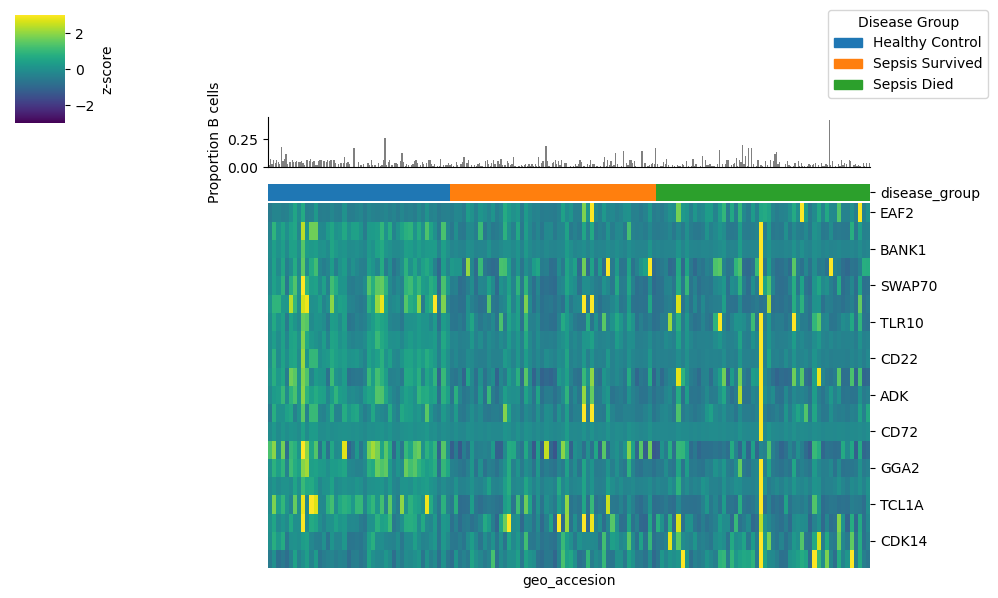

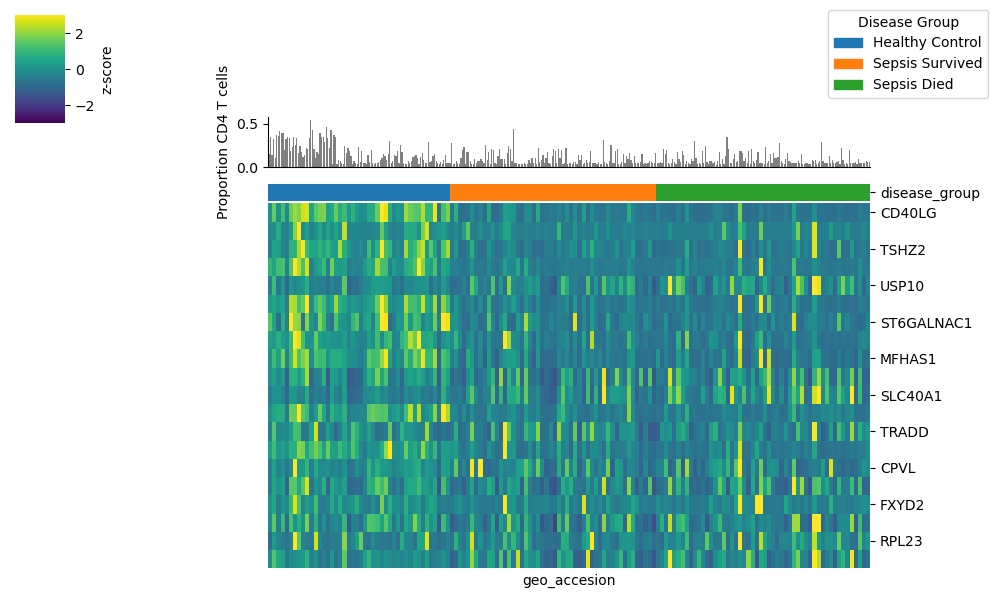

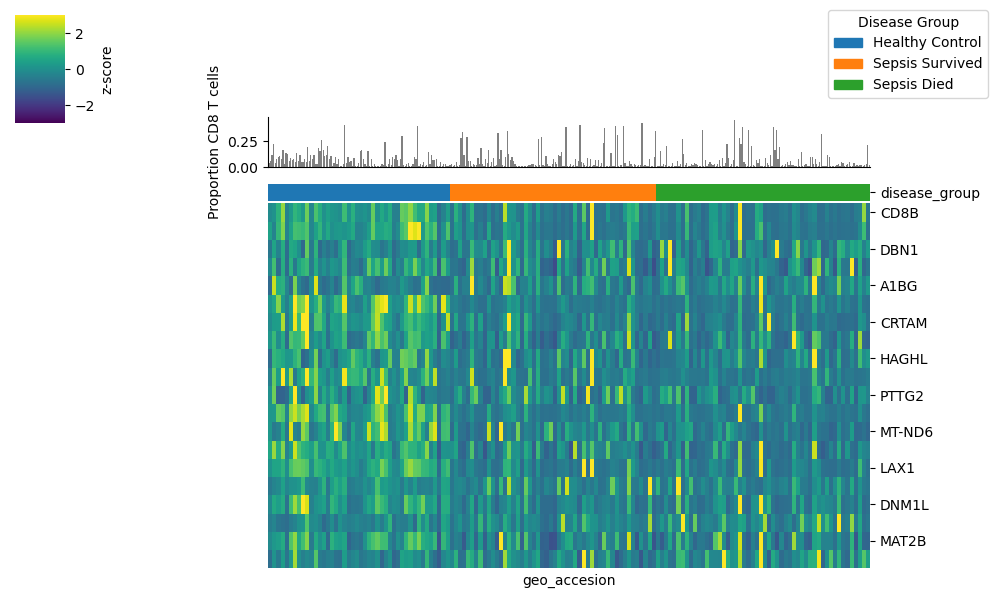

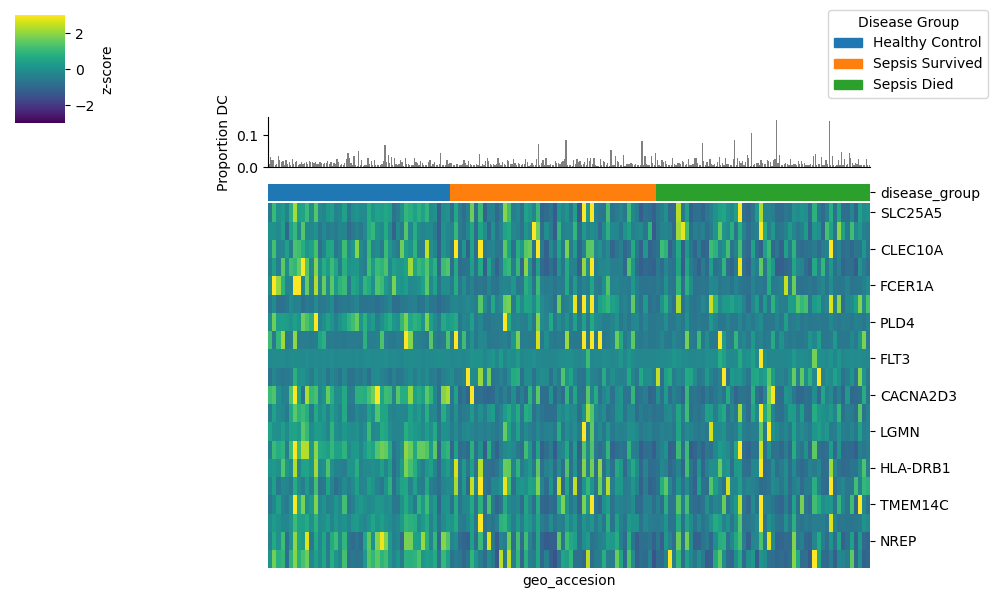

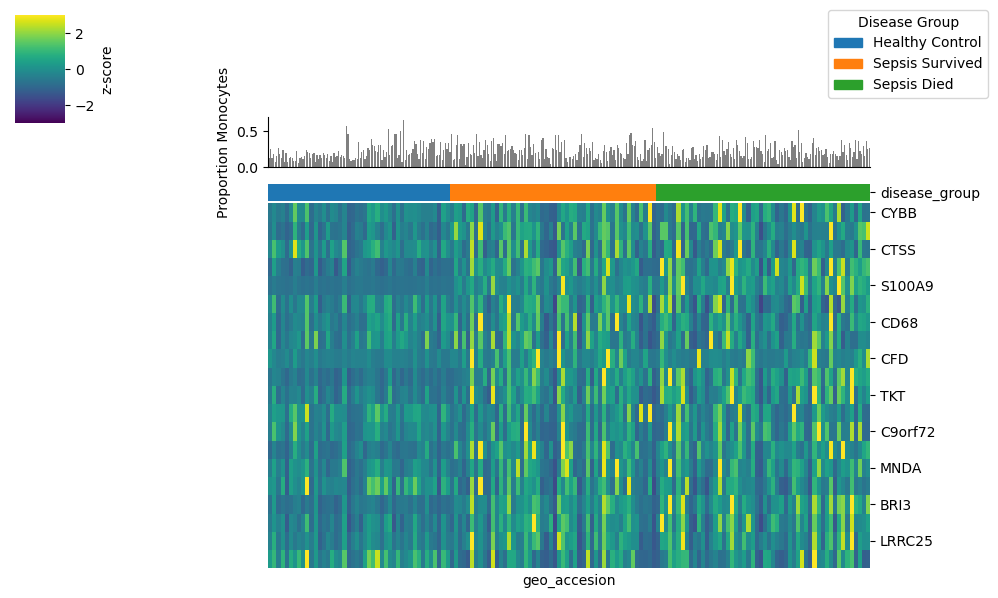

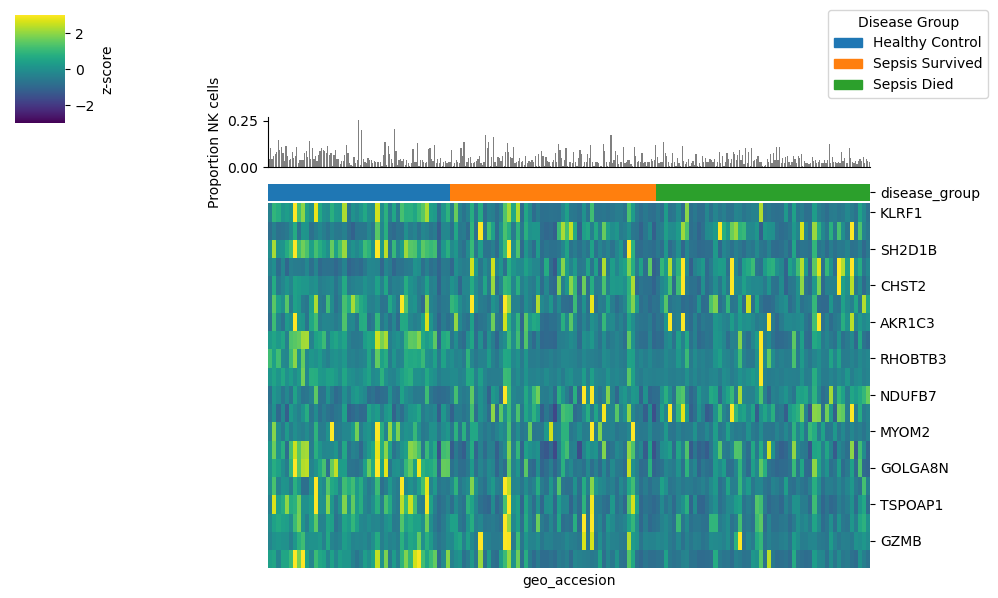

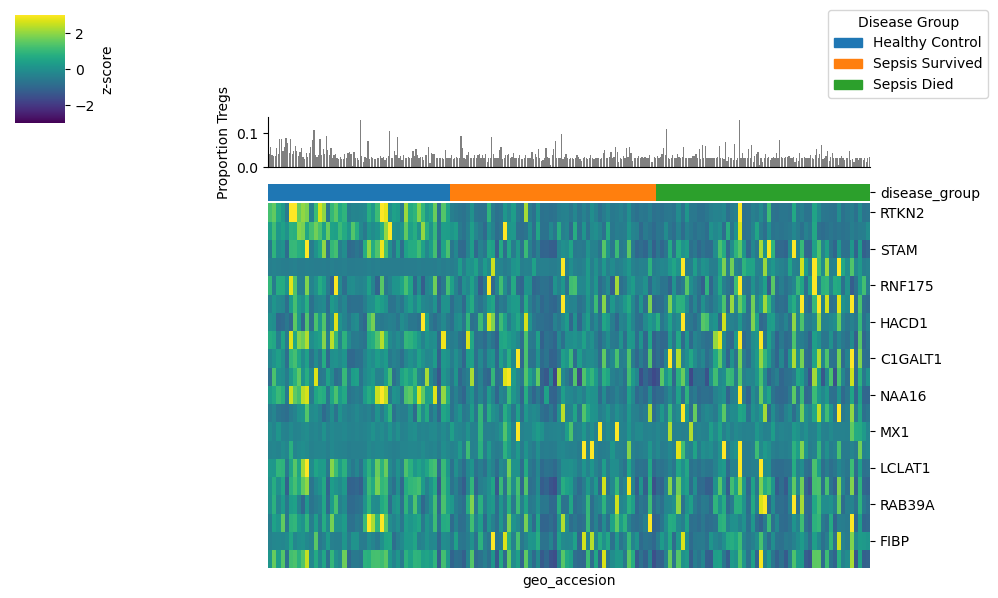

In [11]:
# Function for heatmap
import matplotlib.patches as mpatches

def explain_heatmap_features(model, estimators, data, prop, cell_type, anno, samples):

    # Get most important features
    index = estimators.index(cell_type)
    feature_importance = model.estimators_[index].feature_importances_
    sorted_idx = np.argsort(feature_importance) # sort highest to lowest importance and get the feature indices
    most_important_features = sorted_idx[-20:] # get 20 most important features
    genes = np.flip(np.array(model.estimators_[index].feature_names_in_.tolist())[most_important_features])

    # Format data
    data_selected = data[genes].transpose() # subset bulk data

    #data_selected = np.log1p(data_selected)
    #data_selected = pd.DataFrame(index=data_selected.index.tolist(), columns=data_selected.columns.tolist(), data=stats.zscore(np.array(data_selected), axis = 1))
    prop_series = pd.Series(prop[cell_type]) # series for proportion for cell type investigated here

    # Remove genes with all-zero expression across samples
    df_filtered = data_selected
    non_zero_genes = (df_filtered.sum(axis=1) != 0)
    df_filtered = df_filtered.loc[non_zero_genes]
    df_filtered = df_filtered[samples]

    anno = anno.loc[df_filtered.columns.tolist(),]

    # Make a color palette for the unique disease groups
    palette = dict(zip(['Healthy Control', 'Sepsis Survived', 'Sepsis Died'], sns.color_palette("tab10", anno["disease_group"].nunique())))

    # Map disease groups to colors
    row_colrs = anno["disease_group"].map(palette)

    # Create clustermap
    g = sns.clustermap(
        df_filtered,
        col_cluster=False,
        row_cluster=False,
        col_colors=row_colrs,
        cmap="viridis",
        vmin=-3, vmax=3, 
        cbar_kws={"label": "z-score"}, 
        figsize=(10, 6),
        dendrogram_ratio=0.3,
        z_score=0,
        xticklabels=False
    )

    # Build legend patches from the palette
    handles = [mpatches.Patch(color=color, label=group)
            for group, color in palette.items()]

    # Add the legend to the heatmap
    plt.legend(handles=handles,
            title="Disease Group",
            bbox_to_anchor=(1, 1),   # position: top-right outside
            bbox_transform=plt.gcf().transFigure,
            loc='upper right')


    # Reorder the sample values to match clustered column order
    #col_order = [data_selected.columns[i] for i in g.dendrogram_col.reordered_ind]
    #prop_series_reordered = prop_series[col_order]

    # Add a new axis on top for the bar plot
    # Position: [left, bottom, width, height] in figure coordinates
    bar_height = 0.5  # relative height of bar plot
    heatmap_pos = g.ax_heatmap.get_position()

    bar_ax = g.fig.add_axes([
        heatmap_pos.x0,                      # left
        heatmap_pos.y1 + 0.06,               # bottom just above heatmap
        heatmap_pos.width,                   # same width as heatmap
        bar_height / g.fig.get_size_inches()[1]  # normalized height
    ])

    # ---- 5. Plot bars ----
    bar_ax.bar(
        x=np.arange(len(prop_series)),
        #height=prop_series_reordered,
        height=prop_series,
        color="gray"
    )

    # Remove x ticks
    bar_ax.set_xticks([])
    #bar_ax.set_xlim(-0.5, len(prop_series_reordered) - 0.5)
    bar_ax.set_xlim(-0.5, len(prop_series) - 0.5)
    bar_ax.set_ylabel(f"Proportion {cell_type}")

    # Optional: make y-axis more compact
    bar_ax.spines["top"].set_visible(False)
    bar_ax.spines["right"].set_visible(False)

    #plt.title(f"Prediction and Expression of most important features for {cell_type}", )
    plt.savefig(f"Figure_3B_{cell_type}.svg", dpi=300)

    return g

bulk_sorted = bulks.loc[anno.index.tolist(),]

for cell_type in estimators:
    explain_heatmap_features(model_file, estimators, bulk_sorted, pred, cell_type, anno, indices)

Reanalyse by summarizing disease groups, test different summary and normalization approaches.

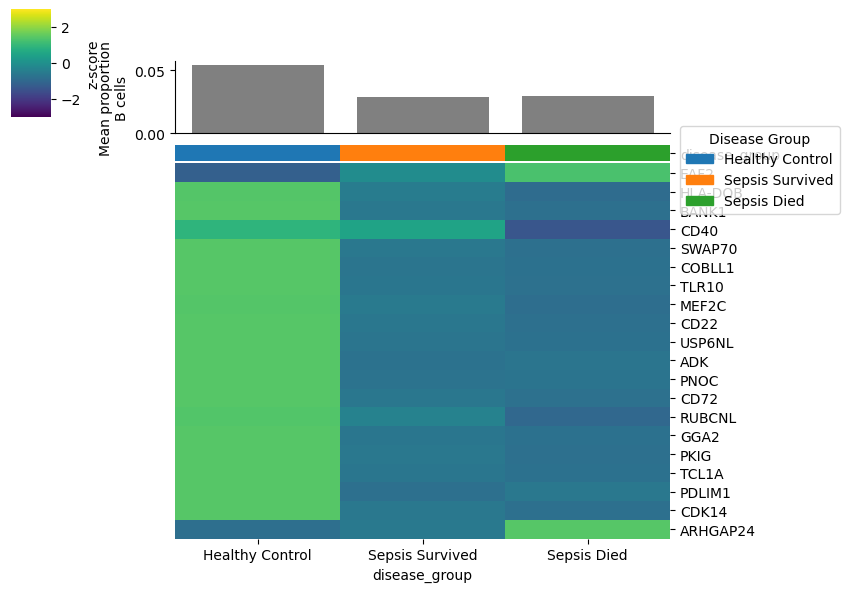

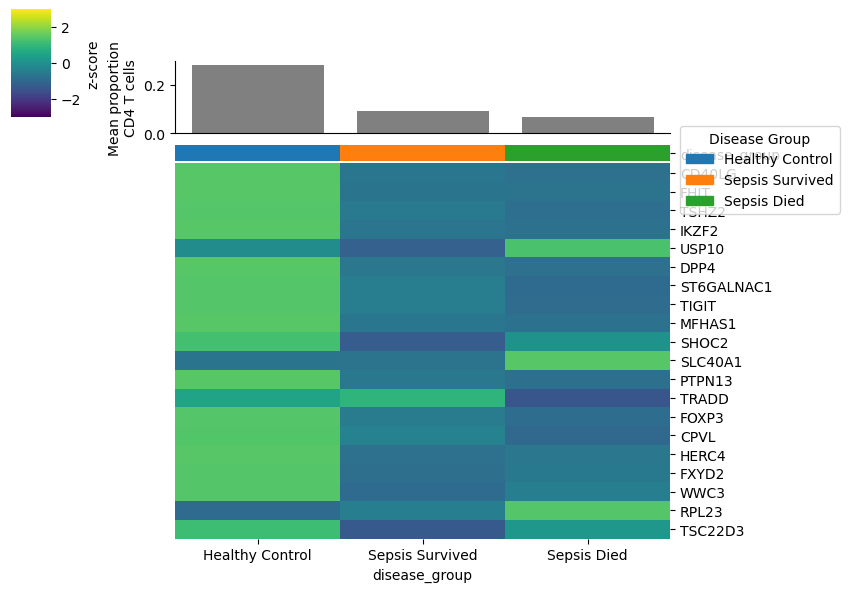

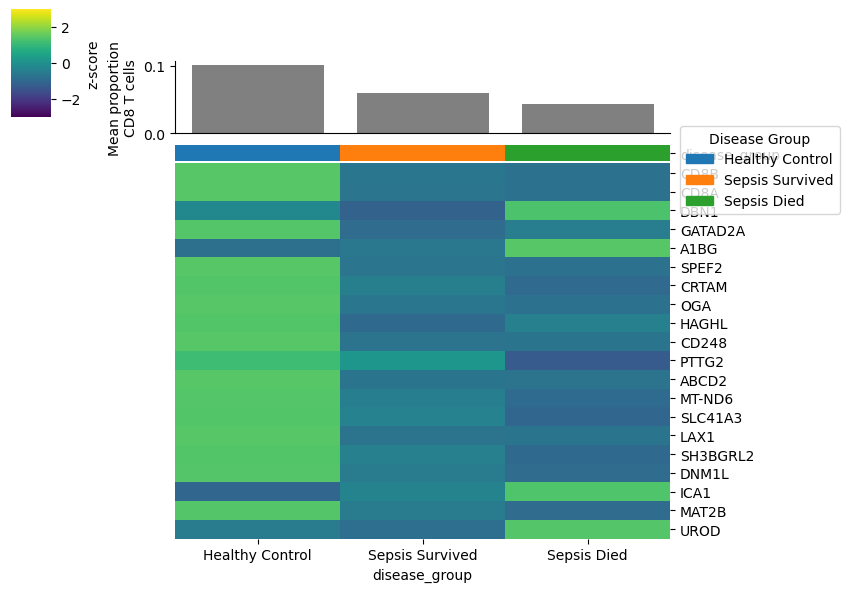

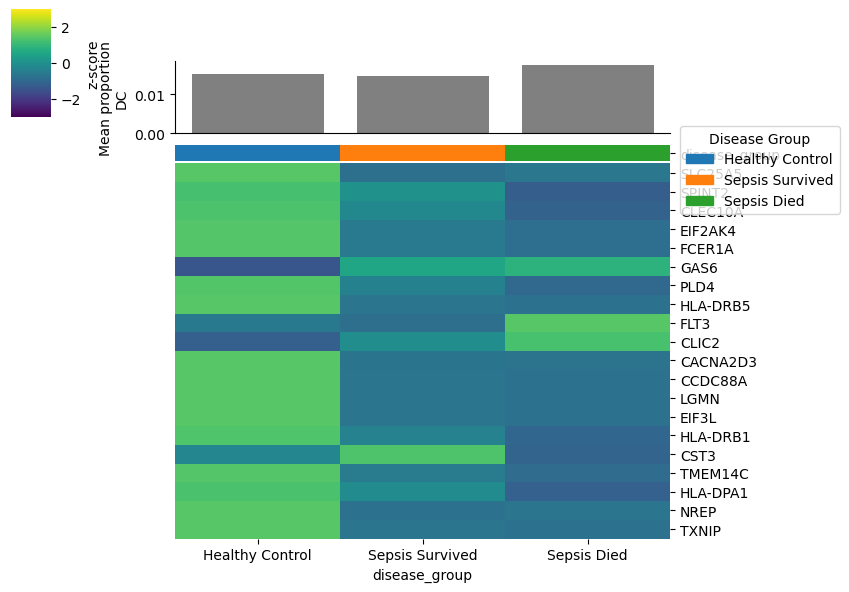

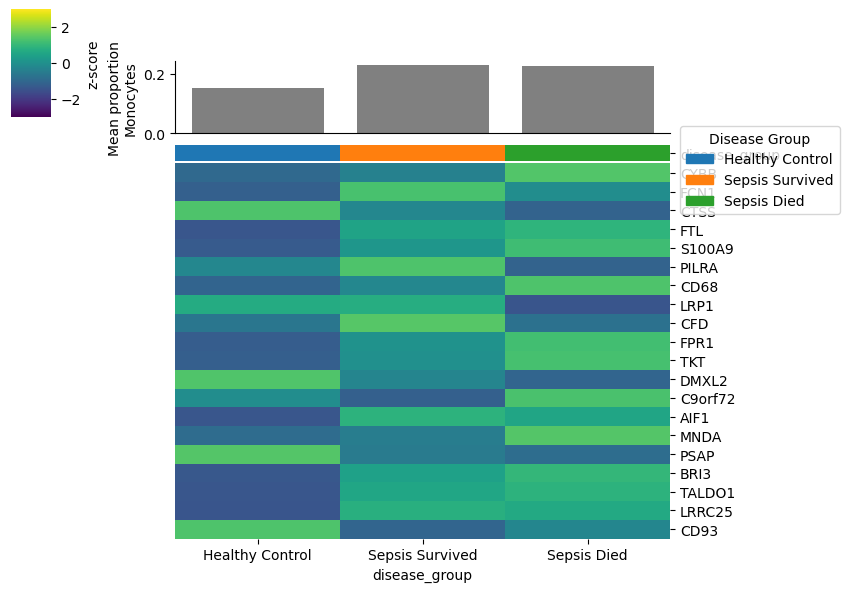

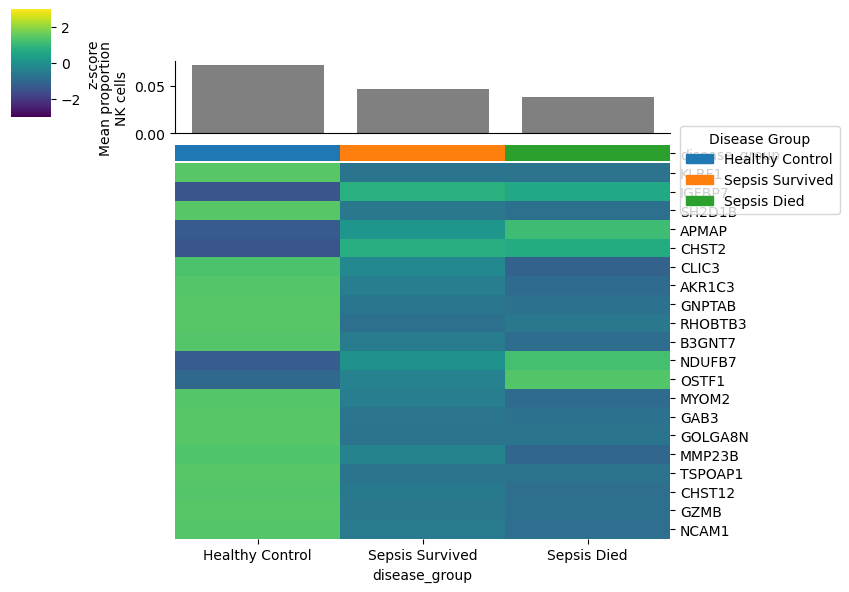

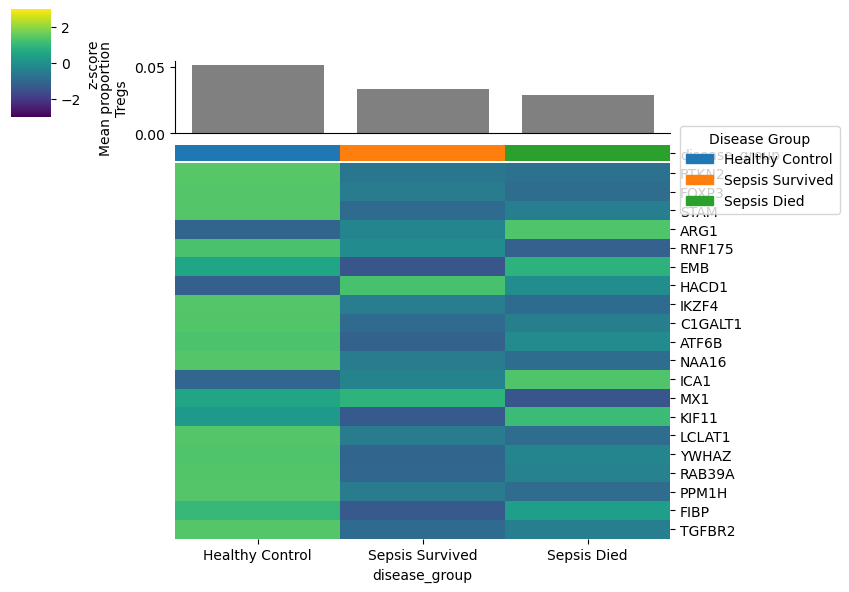

In [18]:
# Function for heatmap (group-summary per gene per disease group)
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from scipy import stats

def explain_heatmap_features(
    model,
    estimators,
    data,
    prop,
    cell_type,
    anno,
    samples,
    agg="mean",                 # "mean" | "median" | "gmean"
    normalize=None,             # None | "zscore" | "log1p" | "log1p_zscore"
    plot_heatmap=True,          # if False: just return the summarized matrix
    n_genes=20,
    figsize=(8, 6),
    cmap="viridis"
):

    # 1) Most important features (genes) for this cell type
    index = estimators.index(cell_type)
    feature_importance = model.estimators_[index].feature_importances_
    sorted_idx = np.argsort(feature_importance)
    most_important_features = sorted_idx[-n_genes:]
    genes = np.flip(np.array(model.estimators_[index].feature_names_in_.tolist())[most_important_features])

    # 2) Subset and align data/anno to samples
    data_selected = data.loc[samples, genes].copy()  # rows=samples, cols=genes
    anno_sub = anno.loc[samples].copy()

    # Remove genes with all-zero expression across the selected samples
    non_zero_genes = (data_selected.sum(axis=0) != 0)
    data_selected = data_selected.loc[:, non_zero_genes]

    # 3) Aggregate expression per gene per disease group
    groups = anno_sub["disease_group"].astype(str)

    if agg not in {"mean", "median", "gmean"}:
        raise ValueError("agg must be one of: 'mean', 'median', 'gmean'.")

    if agg == "mean":
        expr_group = data_selected.groupby(groups).mean()
    elif agg == "median":
        expr_group = data_selected.groupby(groups).median()
    else:
        def _gmean_df(df):
            eps=1e-9
            return np.exp(np.log(df + eps).mean(axis=0)) - eps

        expr_group = data_selected.groupby(groups).apply(_gmean_df)

    # expr_group is disease_group x genes
    mat = expr_group.T

    # 4) Optional normalization
    label = "expression"
    if normalize is None:
        pass
    elif normalize == "log1p":
        mat = np.log1p(mat)
        label = "log1p(expression)"
    elif normalize == "zscore":
        mat = pd.DataFrame(
            data=stats.zscore(mat.values, axis=1, nan_policy="omit"),
            index=mat.index,
            columns=mat.columns
        )
        label = "z-score"
    elif normalize == "log1p_zscore":
        mat = np.log1p(mat)
        mat = pd.DataFrame(
            data=stats.zscore(mat.values, axis=1, nan_policy="omit"),
            index=mat.index,
            columns=mat.columns
        )
        label = "log1p(expression) z-score"
    else:
        raise ValueError("normalize must be one of: None, 'zscore', 'log1p', 'log1p_zscore'.")

    if not plot_heatmap:
        return mat

    # 5) Heatmap (genes x disease groups)
    desired_order = ["Healthy Control", "Sepsis Survived", "Sepsis Died"]
    col_order = [c for c in desired_order if c in mat.columns] + [c for c in mat.columns if c not in desired_order]
    mat = mat[col_order]

    # color strip for disease groups (columns)
    palette = dict(zip(col_order, sns.color_palette("tab10", len(col_order))))
    col_colors = pd.Series(mat.columns, index=mat.columns).map(palette)

    # If z-scored, symmetric limits look best; otherwise let it autoscale.
    vmin = vmax = None
    if normalize in {"zscore", "log1p_zscore"}:
        vmin, vmax = -3, 3

    g = sns.clustermap(
        mat,
        col_cluster=False,
        row_cluster=False,
        col_colors=col_colors,
        cmap=cmap,
        vmin=vmin, vmax=vmax,
        cbar_kws={"label": label},
        figsize=figsize,
        dendrogram_ratio=0.25,
        xticklabels=True,
        yticklabels=True
    )

    # Legend for disease group colors
    handles = [mpatches.Patch(color=palette[group], label=group) for group in col_order]
    g.ax_heatmap.legend(
        handles=handles,
        title="Disease Group",
        bbox_to_anchor=(1.02, 1.1),
        loc="upper left",
        borderaxespad=0
    )

    # --- 6) Bar plot of predicted proportions above the heatmap (summarized per group) ---
    # Summarize proportion per disease group to match the grouped heatmap
    prop_series = pd.Series(prop[cell_type], index=samples)
    prop_group = prop_series.groupby(groups).mean().reindex(col_order)

    heatmap_pos = g.ax_heatmap.get_position()
    bar_ax = g.fig.add_axes([
        heatmap_pos.x0,
        heatmap_pos.y1 + 0.05,
        heatmap_pos.width,
        0.12
    ])

    bar_ax.bar(np.arange(len(prop_group)), prop_group.values, color="gray")
    bar_ax.set_xticks([])
    bar_ax.set_xlim(-0.5, len(prop_group) - 0.5)
    bar_ax.set_ylabel(f"Mean proportion\n{cell_type}")

    bar_ax.spines["top"].set_visible(False)
    bar_ax.spines["right"].set_visible(False)

    # Save
    g.fig.savefig(f"Figure_3B_{cell_type}_{agg}_{normalize or 'raw'}.svg", dpi=300, bbox_inches="tight")

    return g


bulk_sorted = bulks.loc[anno.index.tolist(),]

for cell_type in estimators:
    explain_heatmap_features(
        model_file, estimators, bulk_sorted, pred, cell_type, anno, indices,
        agg="median",            # "mean" | "median" | "gmean"
        normalize="zscore",      # None | "log1p" | "zscore" | "log1p_zscore"
        plot_heatmap=True
    )


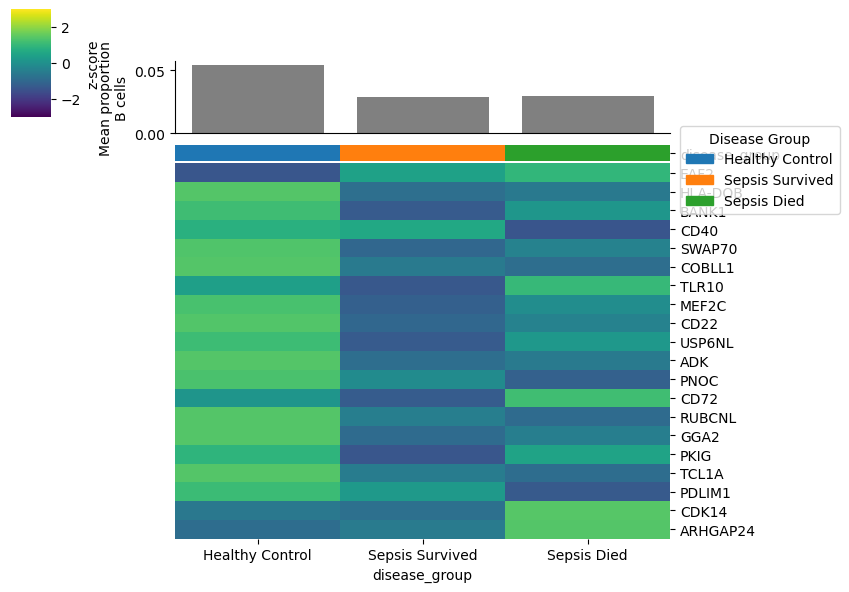

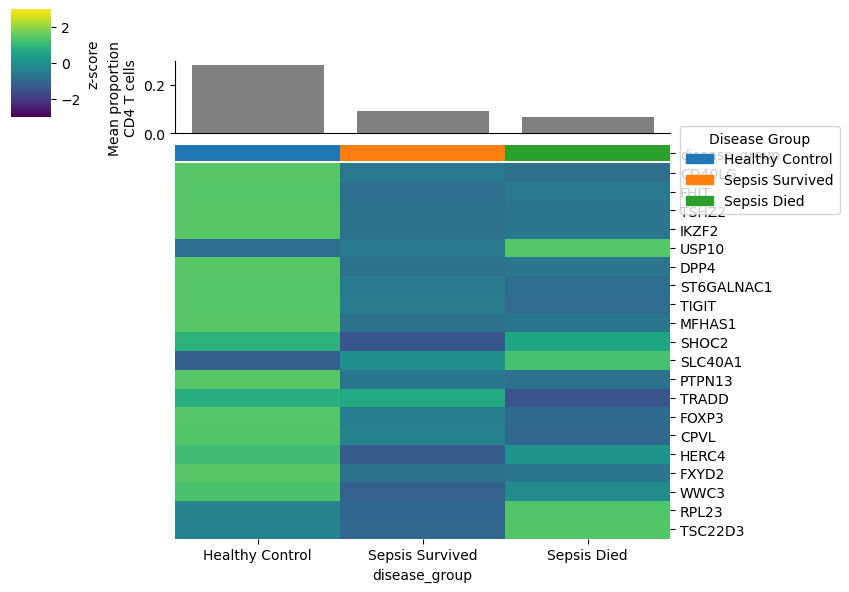

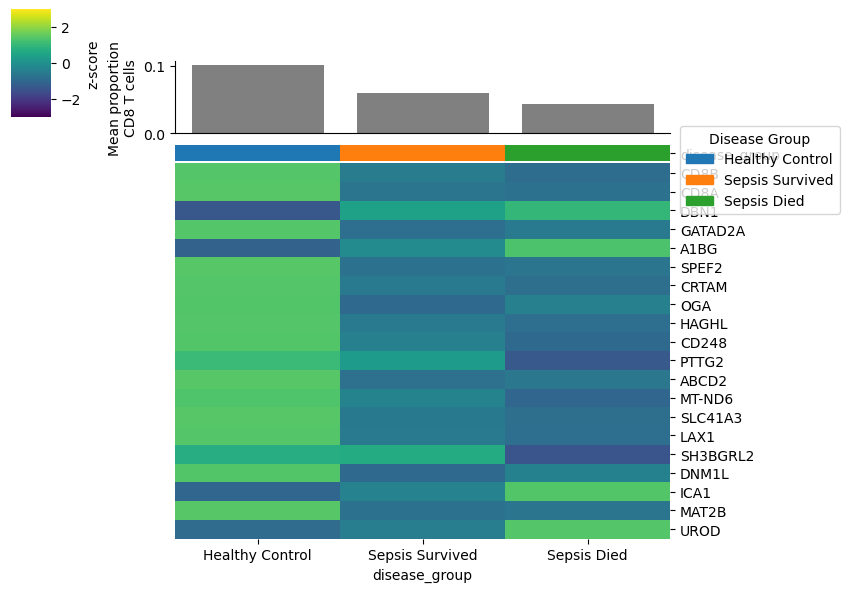

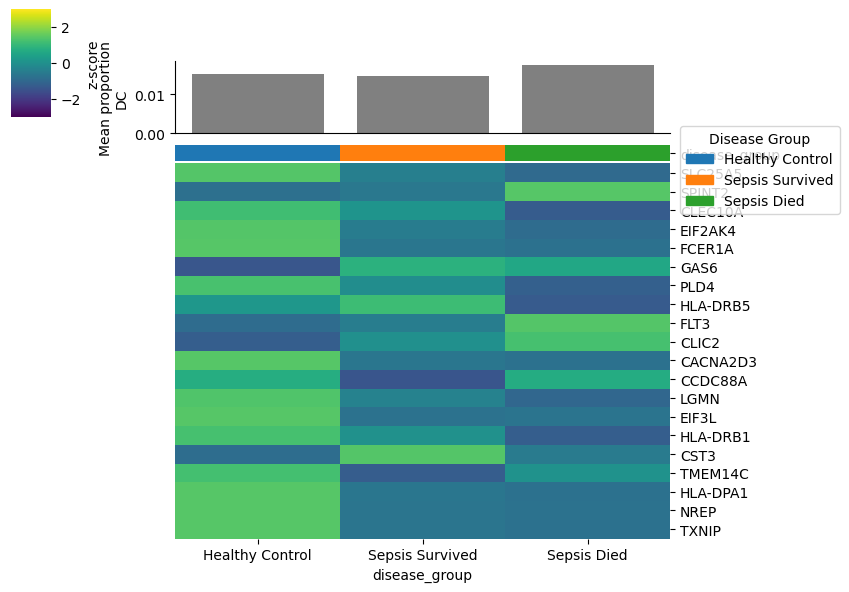

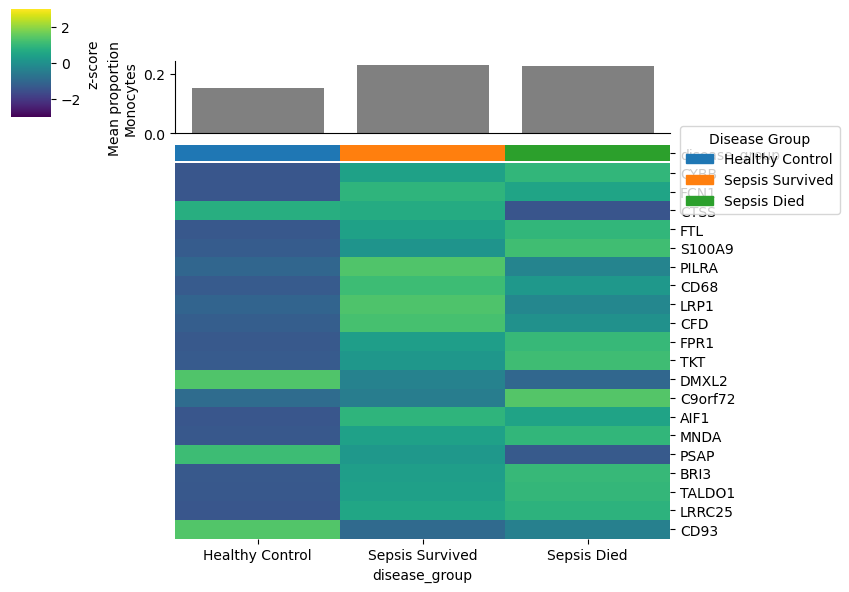

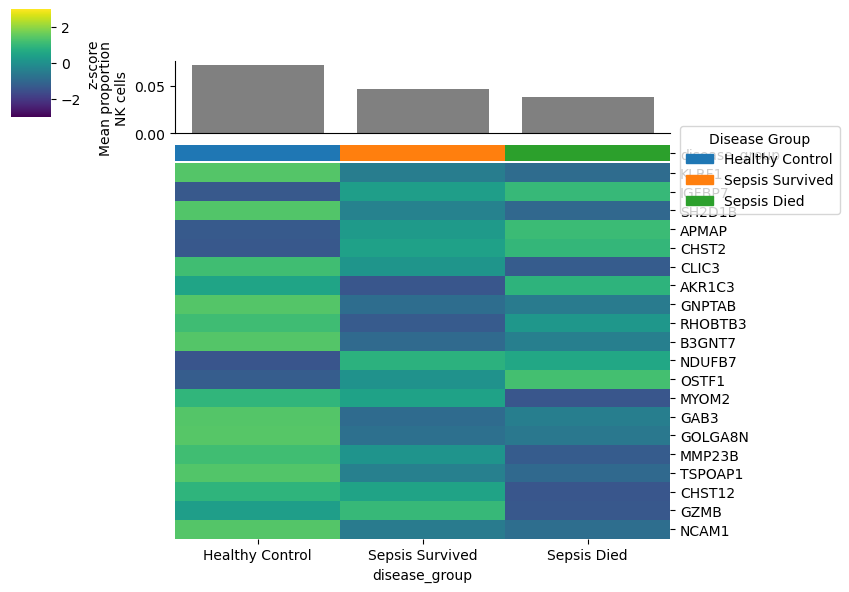

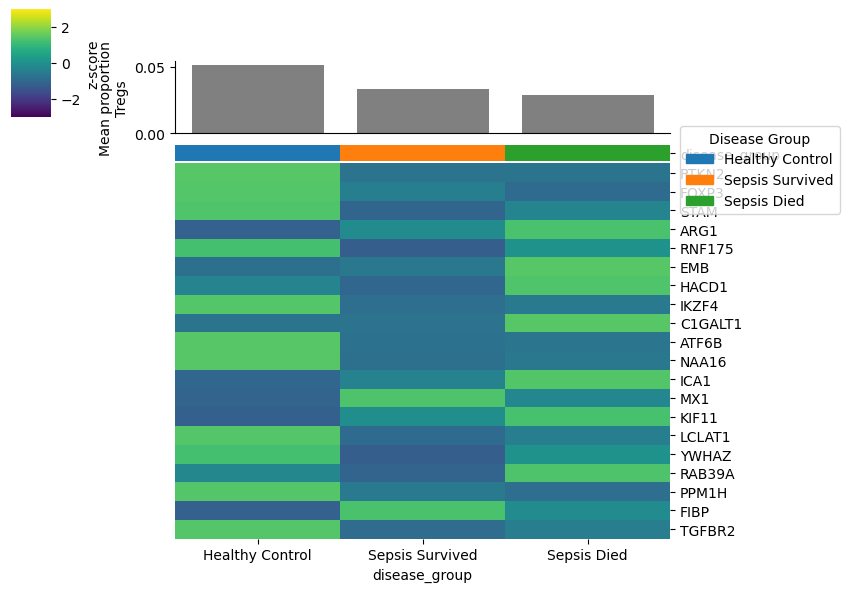

In [19]:
for cell_type in estimators:
    explain_heatmap_features(
        model_file, estimators, bulk_sorted, pred, cell_type, anno, indices,
        agg="mean",            # "mean" | "median" | "gmean"
        normalize="zscore",      # None | "log1p" | "zscore" | "log1p_zscore"
        plot_heatmap=True
    )

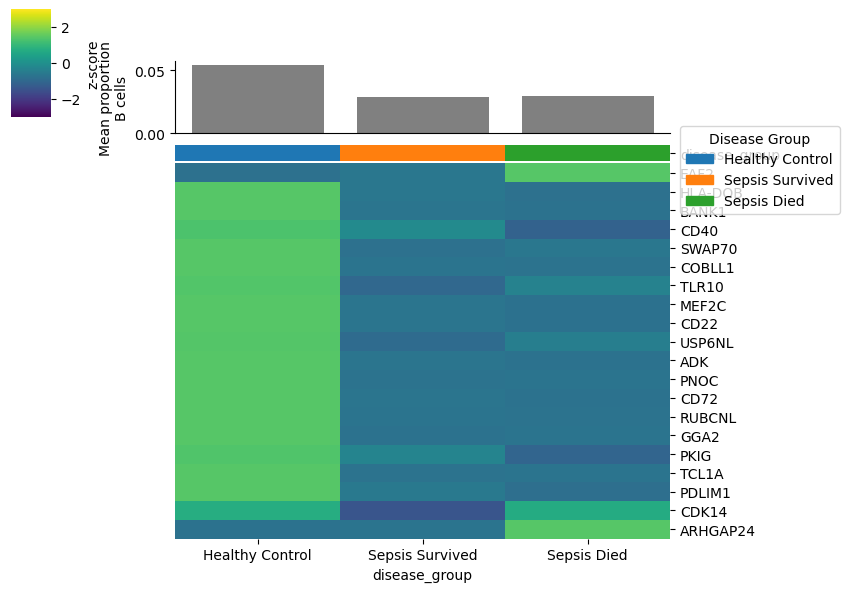

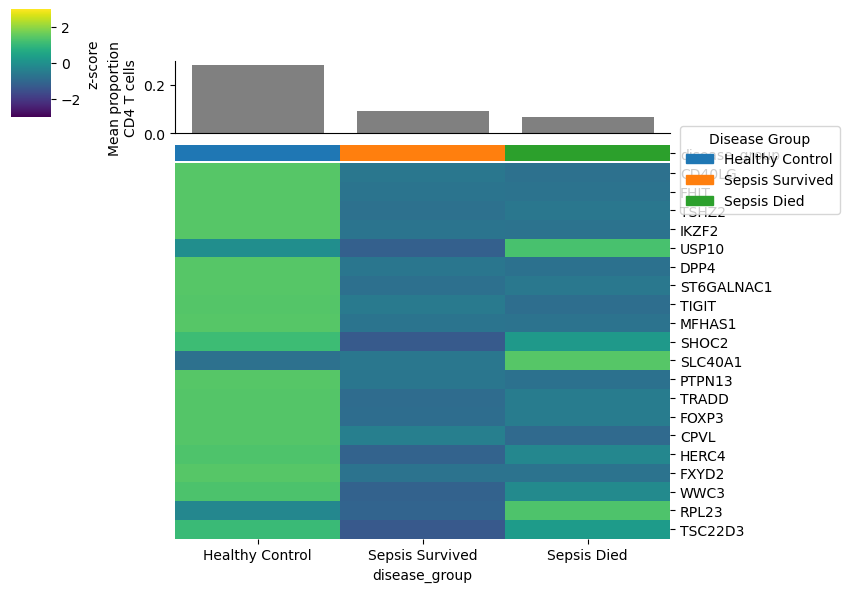

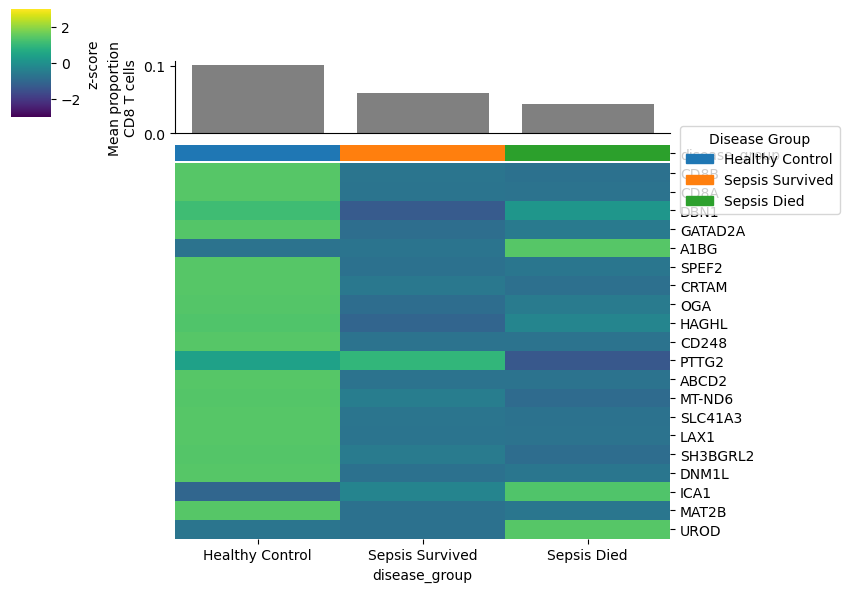

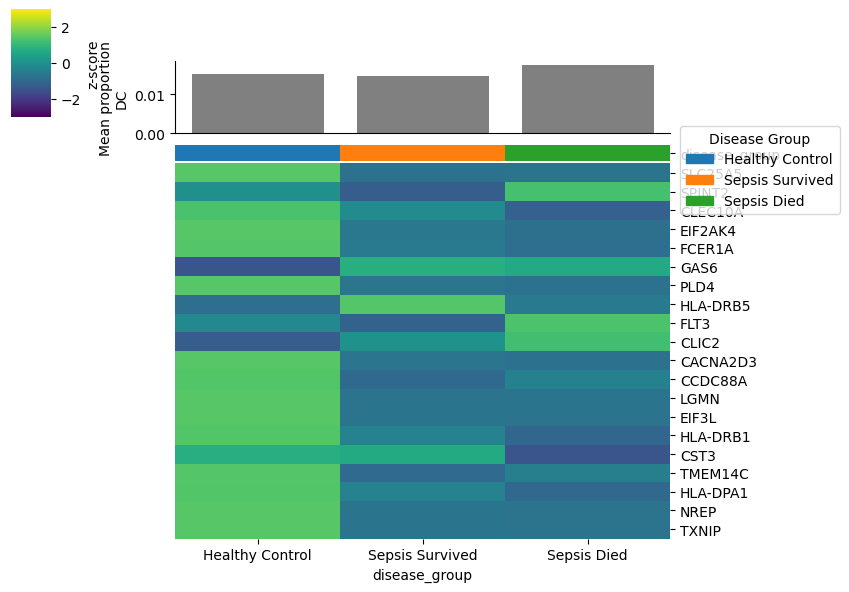

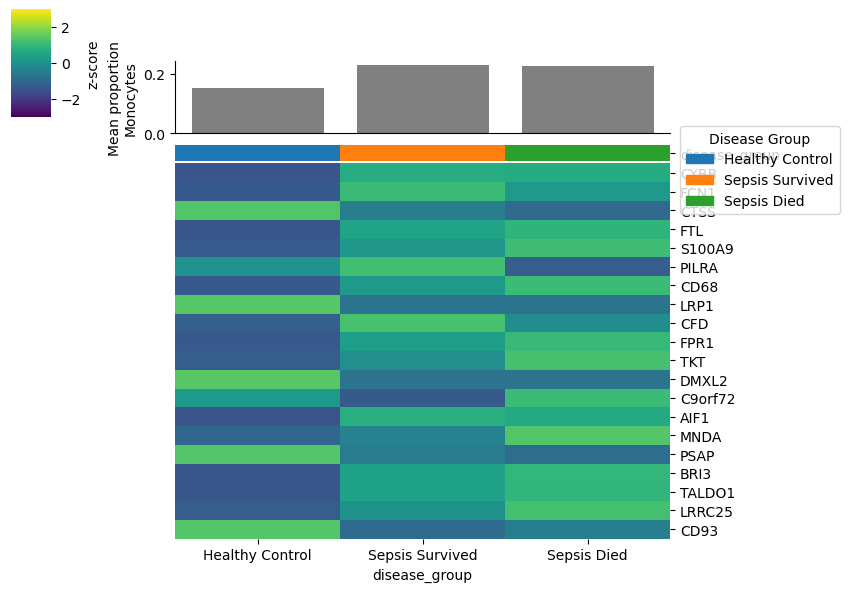

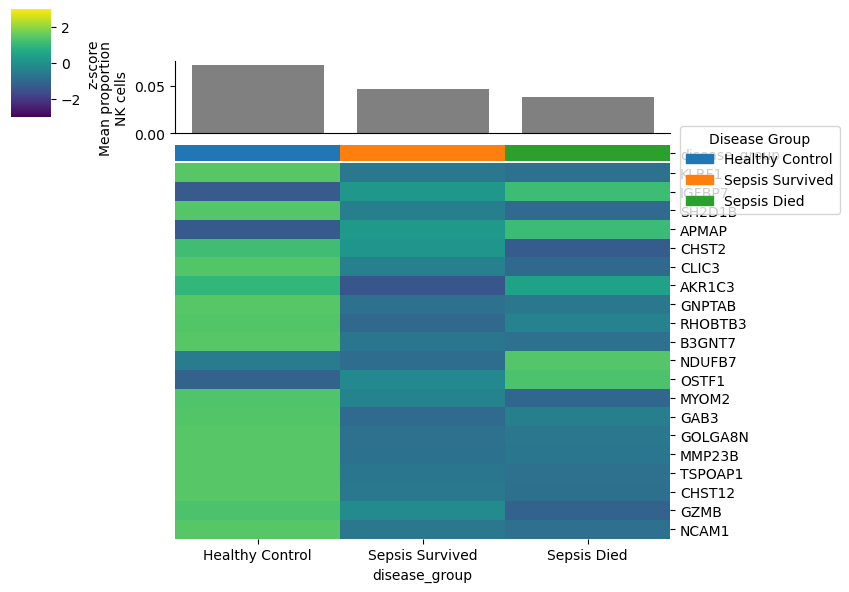

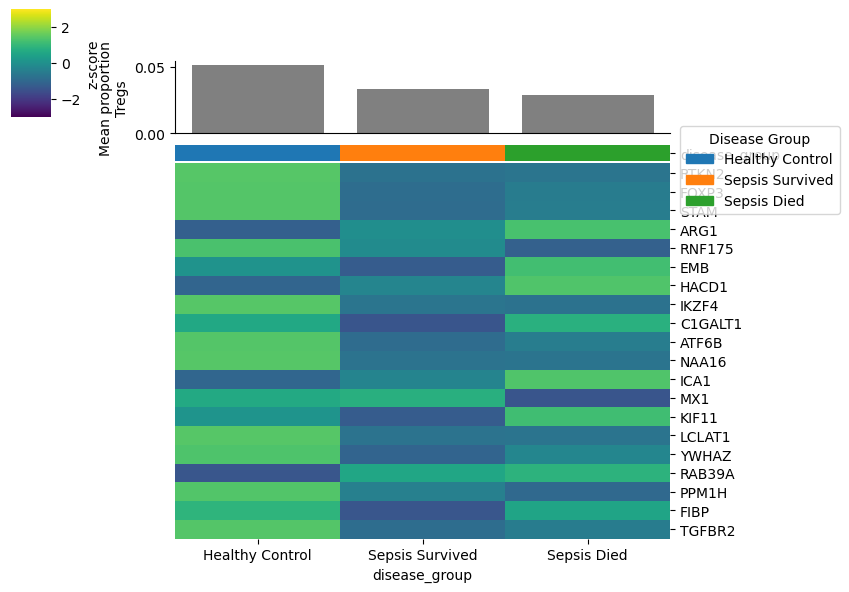

In [15]:
for cell_type in estimators:
    explain_heatmap_features(
        model_file, estimators, bulk_sorted, pred, cell_type, anno, indices,
        agg="gmean",            # "mean" | "median" | "gmean"
        normalize="zscore",      # None | "log1p" | "zscore" | "log1p_zscore"
        plot_heatmap=True
    )

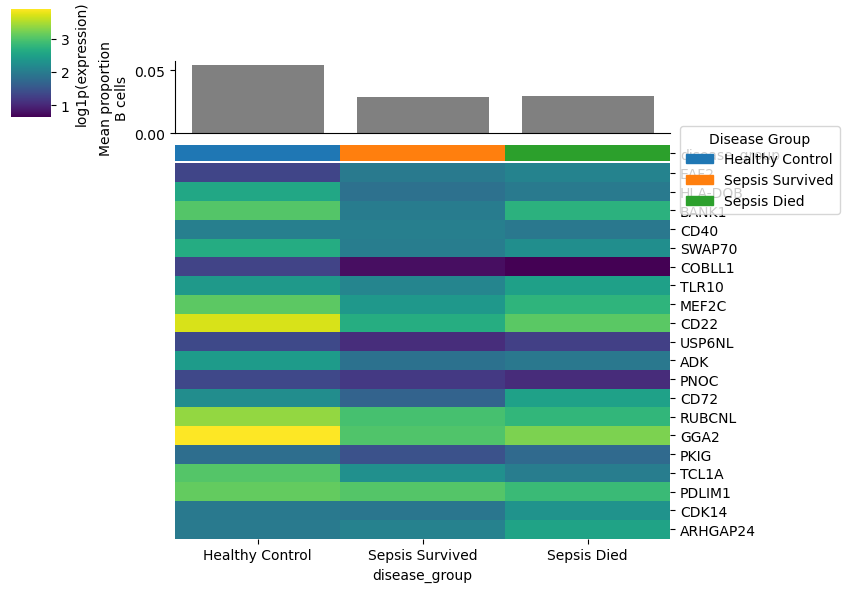

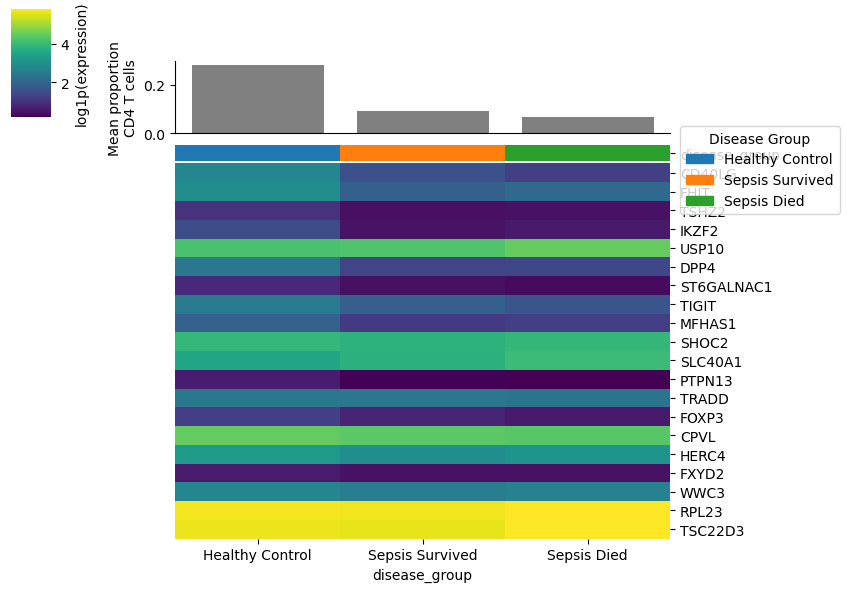

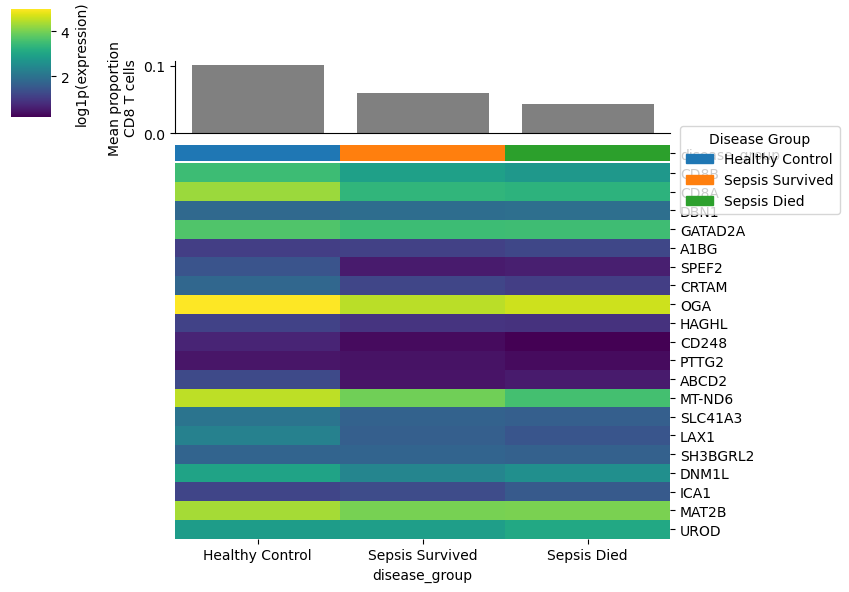

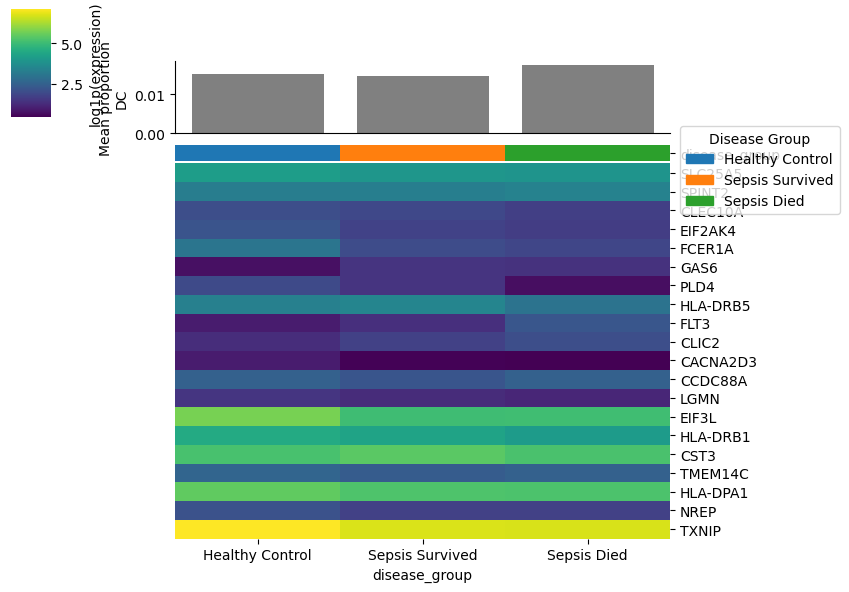

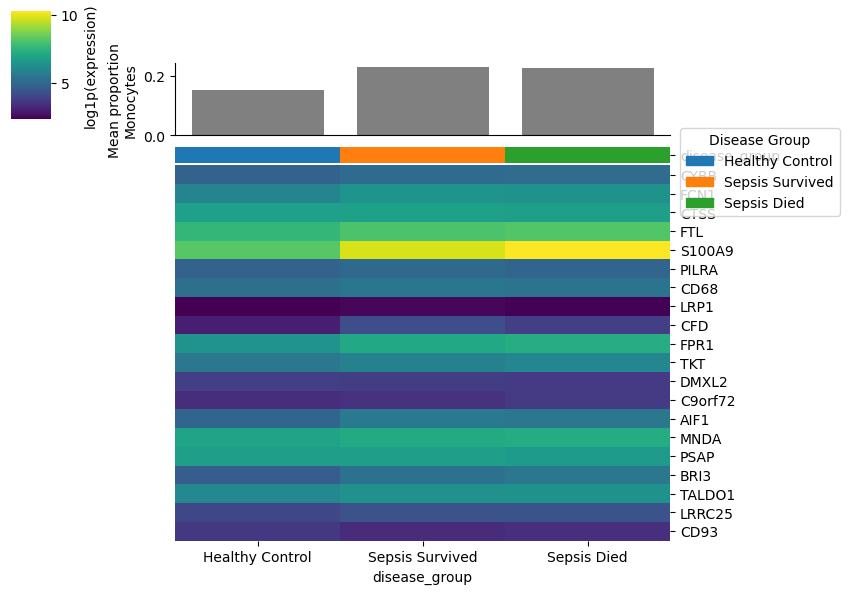

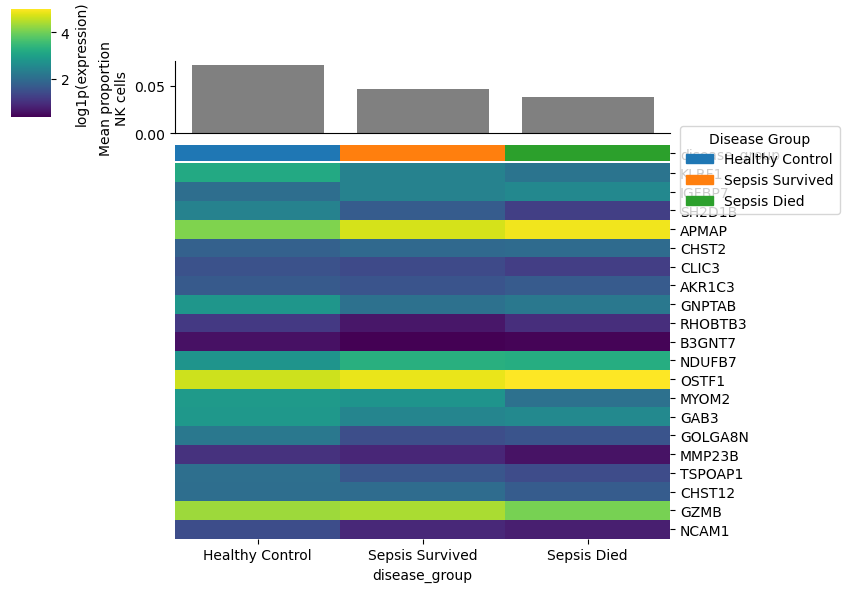

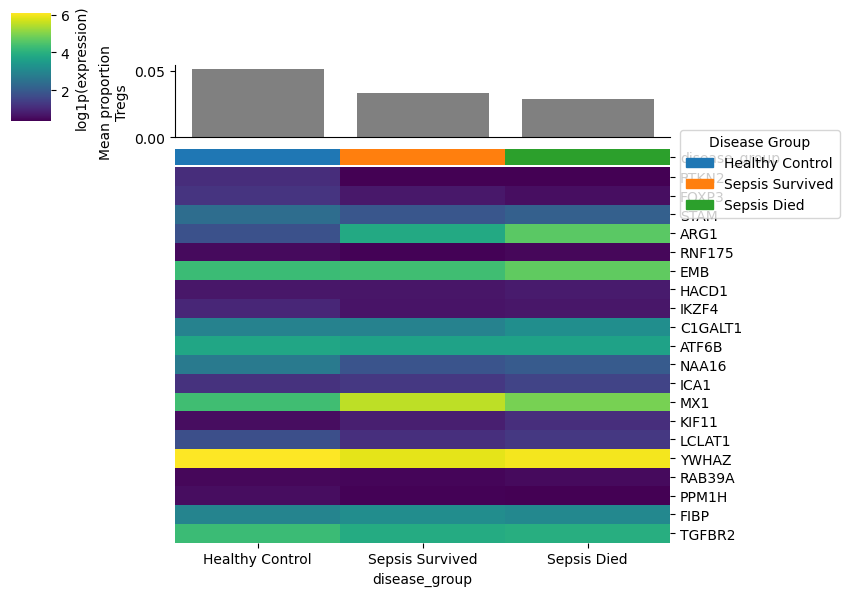

In [16]:
for cell_type in estimators:
    explain_heatmap_features(
        model_file, estimators, bulk_sorted, pred, cell_type, anno, indices,
        agg="mean",            # "mean" | "median" | "gmean"
        normalize="log1p",      # None | "log1p" | "zscore" | "log1p_zscore"
        plot_heatmap=True
    )

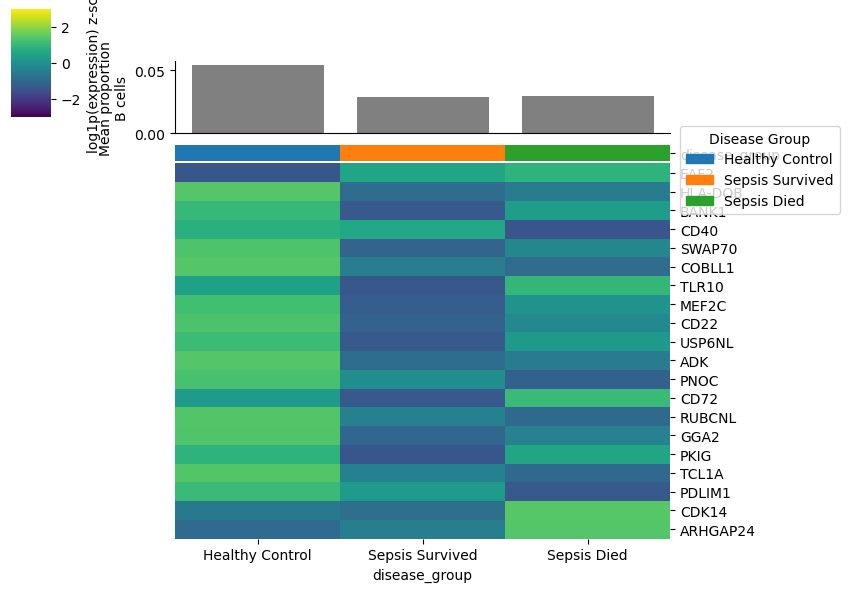

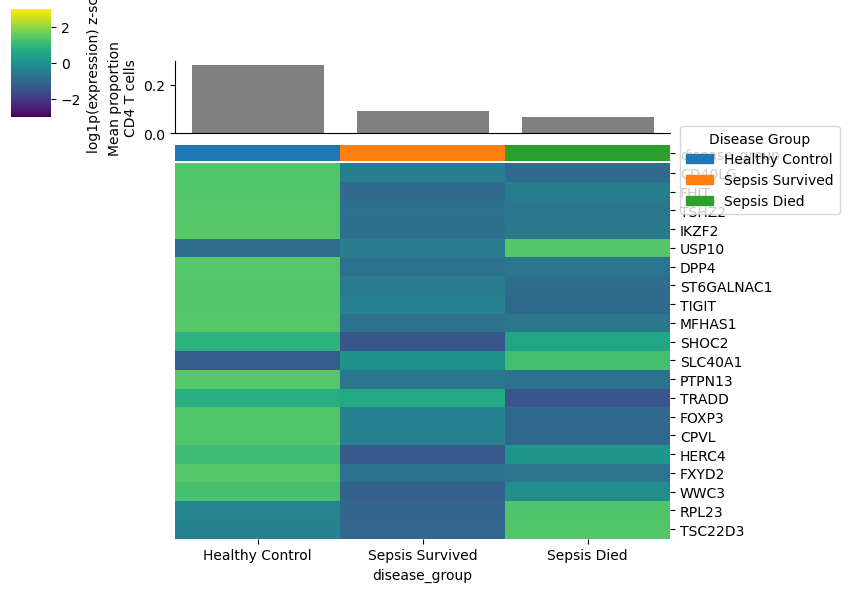

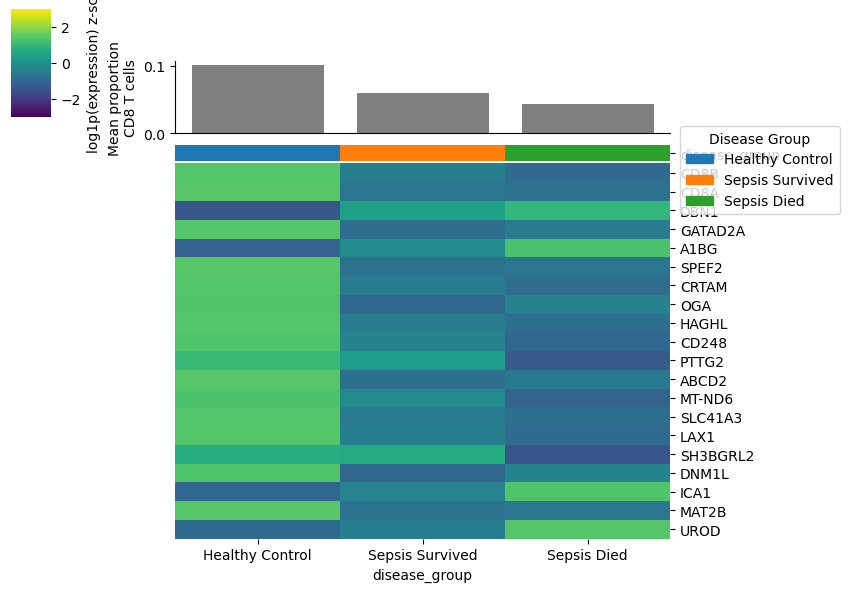

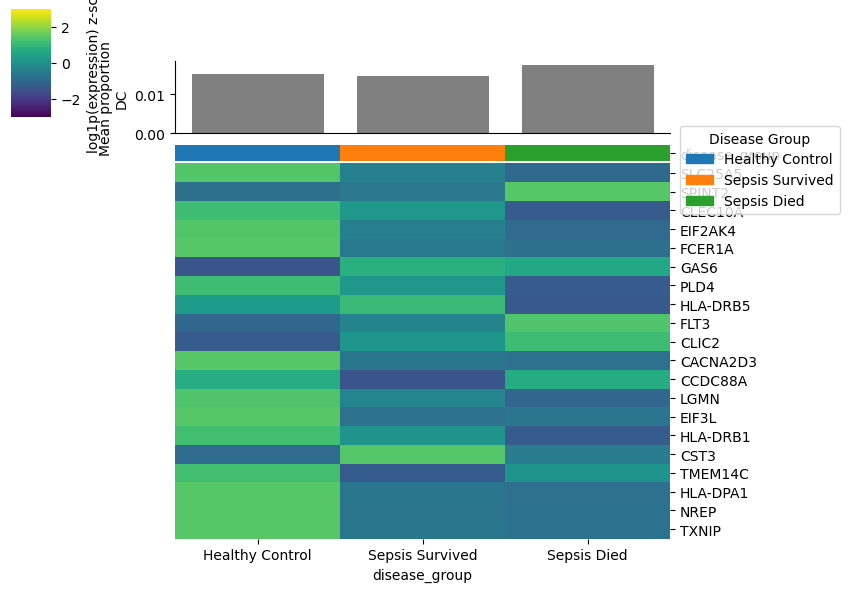

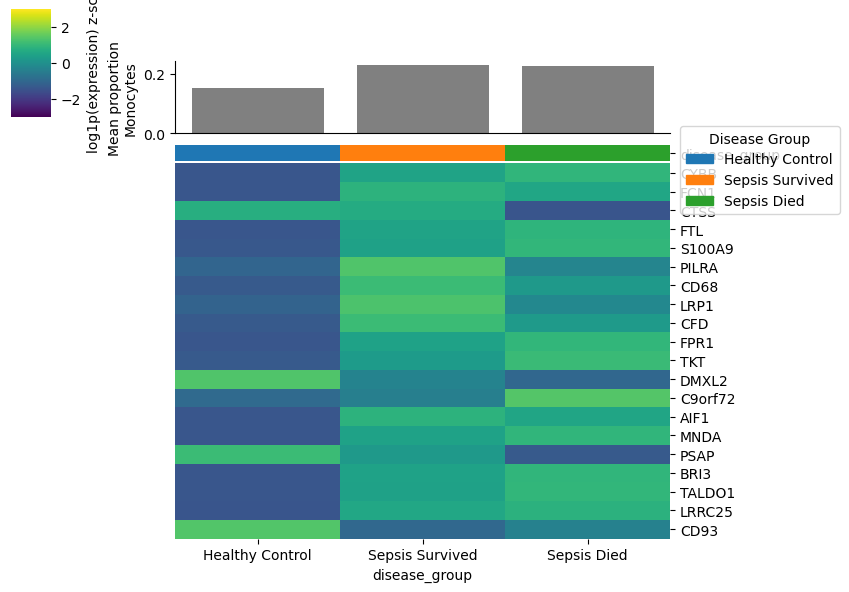

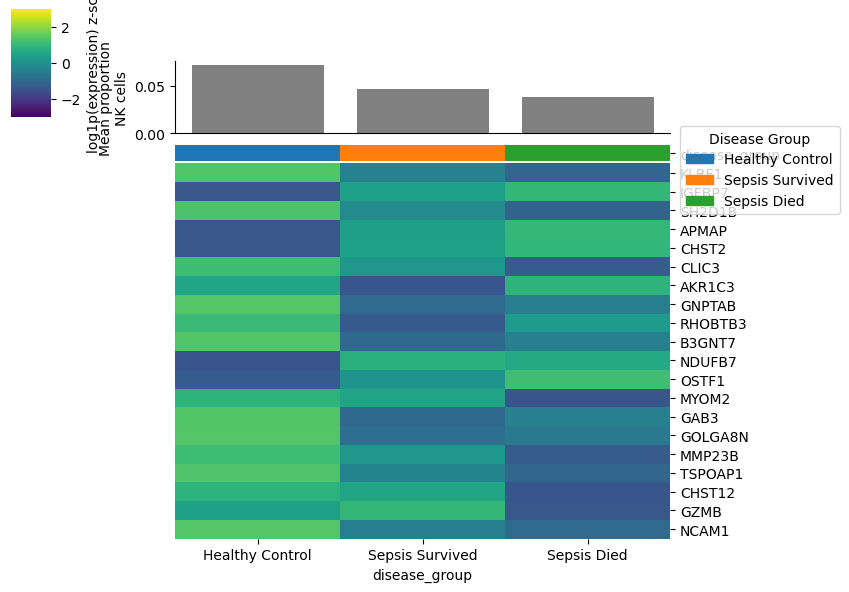

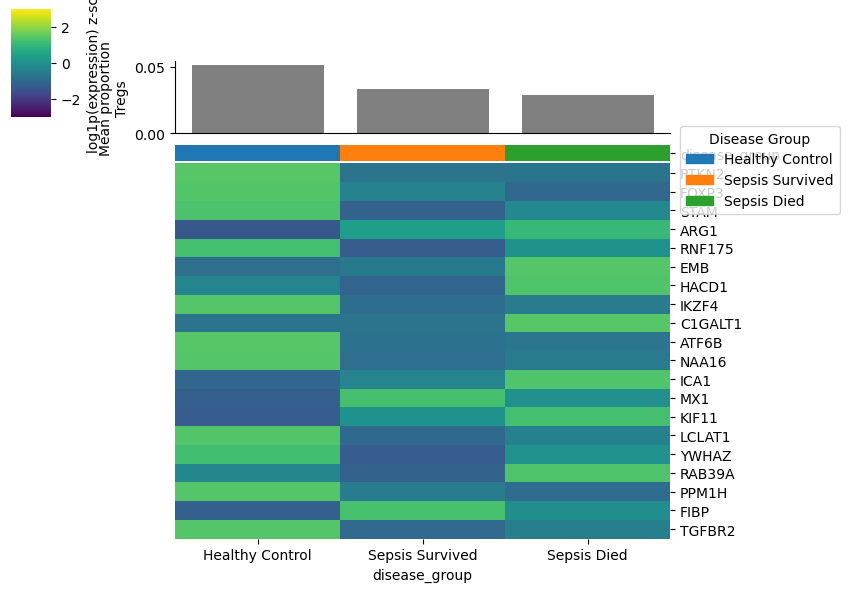

In [17]:
for cell_type in estimators:
    explain_heatmap_features(
        model_file, estimators, bulk_sorted, pred, cell_type, anno, indices,
        agg="mean",            # "mean" | "median" | "gmean"
        normalize="log1p_zscore",      # None | "log1p" | "zscore" | "log1p_zscore"
        plot_heatmap=True
    )